## this is the notebook for doing transfer learning on the potato dataset

In [16]:
import keras
from keras.applications import resnet50
from keras.src.legacy.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf
from keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [7]:
train_datagener = ImageDataGenerator(
    rescale=1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True
    )
test_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True
    )

train_ds = train_datagener.flow_from_directory(
    directory = "splited_potato_dataset/train",
    target_size=(256,256),
    batch_size=32,
    class_mode='categorical',
)

val_ds = test_datagen.flow_from_directory(
    directory = "splited_potato_dataset/val",
    target_size=(256,256),
    batch_size=32,
    class_mode='categorical'
)

Found 2457 images belonging to 7 classes.
Found 916 images belonging to 7 classes.


In [26]:
model = keras.applications.Xception(
    weights=None, input_shape=(256, 256, 3), classes=7)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_ds, epochs=20, validation_data=val_ds,)

Epoch 1/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 771s 10s/step - accuracy: 0.2740 - loss: 2.2900 - val_accuracy: 0.2434 - val_loss: 1.8806
Epoch 2/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 740s 10s/step - accuracy: 0.3310 - loss: 1.6792 - val_accuracy: 0.2434 - val_loss: 1.8252
Epoch 3/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 746s 10s/step - accuracy: 0.4055 - loss: 1.4948 - val_accuracy: 0.2434 - val_loss: 1.8375
Epoch 4/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 731s 9s/step - accuracy: 0.4315 - loss: 1.4292 - val_accuracy: 0.2434 - val_loss: 2.0120
Epoch 5/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 748s 10s/step - accuracy: 0.4822 - loss: 1.3655 - val_accuracy: 0.1812 - val_loss: 2.3765
Epoch 6/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 733s 10s/step - accuracy: 0.4720 - loss: 1.3205 - val_accuracy: 0.2009 - val_loss: 2.6931
Epoch 7/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 747s 10s/step - accuracy: 0.5048 - loss: 1.2528 - val_accuracy: 0.2806 - val_loss: 1.8246
Epoch 8/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 759s 10s/step - accuracy: 0.5346 - loss: 1.1930 - val_accuracy: 0.2

In [17]:
#apply the resnet50 model
model = tf.keras.applications.ResNet50(
    include_top = False,
    input_shape = (256,256,3),
    pooling = 'avg',
    weights = 'imagenet'
)

#freeze the base model
for layer in model.layers:
    layer.trainable = False

#create the model
model = keras.Sequential([
    model,
    layers.Dense(128, activation='relu'),
    layers.Dense(train_ds.num_classes, activation='softmax')
])

In [23]:
model.compile(optimizer='Adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 50
)

val_loss, val_accuracy = model.evaluate(val_ds)
print(f'validation loss: {val_loss}, validation Accuracy: {val_accuracy}')

Epoch 1/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 680s 9s/step - accuracy: 0.5631 - loss: 1.0970 - val_accuracy: 0.5164 - val_loss: 1.4221
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 680s 9s/step - accuracy: 0.5935 - loss: 1.0352 - val_accuracy: 0.4945 - val_loss: 1.9244
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 679s 9s/step - accuracy: 0.6074 - loss: 1.0171 - val_accuracy: 0.3548 - val_loss: 2.5005
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 676s 9s/step - accuracy: 0.6178 - loss: 1.0329 - val_accuracy: 0.4498 - val_loss: 5.6516
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 691s 9s/step - accuracy: 0.6460 - loss: 0.9257 - val_accuracy: 0.5764 - val_loss: 1.1231
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 687s 9s/step - accuracy: 0.6327 - loss: 0.9383 - val_accuracy: 0.4989 - val_loss: 1.6694
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 688s 9s/step - accuracy: 0.6646 - loss: 0.8928 - val_accuracy: 0.5721 - val_loss: 1.3317
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 681s 9s/step - accuracy: 0.6917 - loss: 0.8153 - val_accuracy: 0.6496 - v

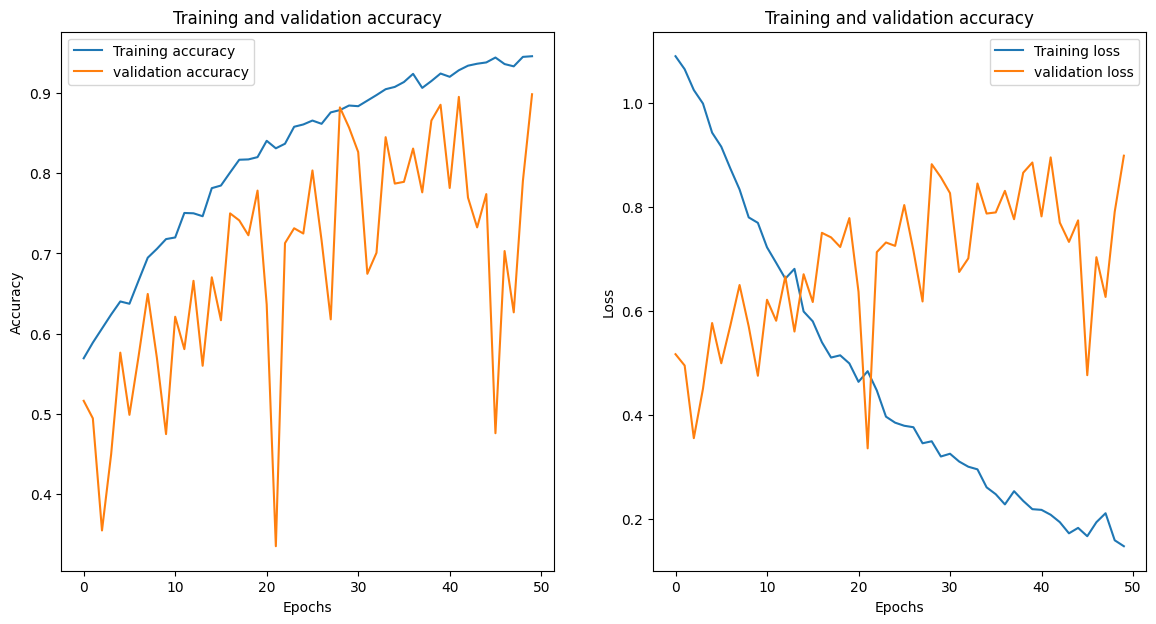


Caching the list of root modules, please wait!
(This will only be done once - type '%rehashx' to reset cache!)



C:\Users\sache\AppData\Roaming\Python\Python311\site-packages\IPython\core\completerlib.py:146: UserWarning: using rootmodules_cache requires you to install the `pickleshare` library.
  ip.db['rootmodules_cache'] = rootmodules_cache


In [28]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(14,7))

fig.add_subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training accuracy', 'validation accuracy'])
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

fig.add_subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training loss', 'validation loss'])
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [25]:
#save the model
model.save(f'model {val_accuracy} %.keras')